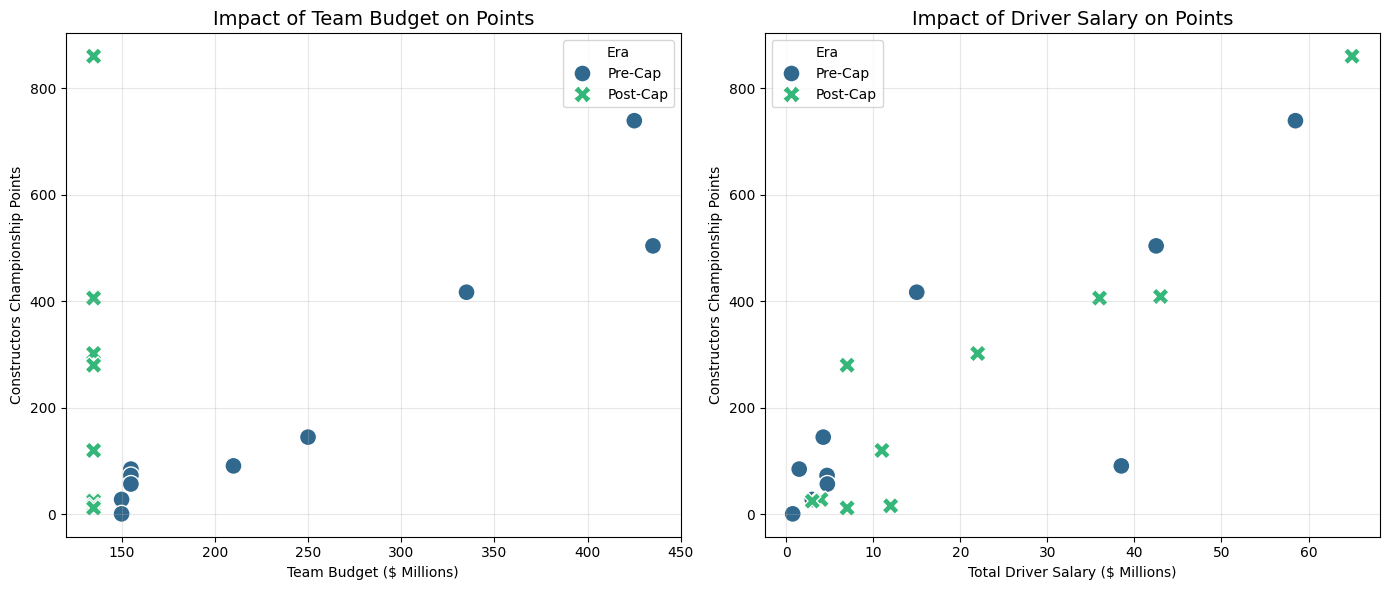

Correlation (Salary vs Points) 2019: 0.8168221865710157
Correlation (Salary vs Points) 2023: 0.9367562310520083

REGRESSION MODEL SUMMARY:
                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     19.04
Date:                Fri, 02 Jan 2026   Prob (F-statistic):           1.58e-05
Time:                        21:52:37   Log-Likelihood:                -123.37
No. Observations:                  20   AIC:                             254.7
Df Residuals:                      16   BIC:                             258.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.02

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# ---------------------------------------------------------
# 1. DATA PREPARATION (Enriched with 2019 & 2023 Full Grid)
# ---------------------------------------------------------
data = {
    'Year': [2019]*10 + [2023]*10,
    'Team': [
        'Mercedes', 'Ferrari', 'Red Bull', 'McLaren', 'Renault', 'Toro Rosso', 'Racing Point', 'Alfa Romeo', 'Haas', 'Williams', # 2019
        'Red Bull', 'Mercedes', 'Ferrari', 'McLaren', 'Aston Martin', 'Alpine', 'Williams', 'AlphaTauri', 'Alfa Romeo', 'Haas'  # 2023
    ],
    'Budget_M': [
        425, 435, 335, 250, 210, 155, 155, 155, 150, 150, # 2019 (High Variance)
        135, 135, 135, 135, 135, 135, 135, 135, 135, 135  # 2023 (Cap Era - Constant)
    ],
    'Driver_Salary_M': [
        58.5, 42.5, 15.0, 4.26, 38.5, 1.5, 4.7, 4.73, 3.0, 0.75, # 2019 (Estimates)
        65, 43, 36, 22, 7, 11, 4, 3, 12, 7                       # 2023 (Estimates)
    ],
    'Points': [
        739, 504, 417, 145, 91, 85, 73, 57, 28, 1,    # 2019 Actuals
        860, 409, 406, 302, 280, 120, 28, 25, 16, 12  # 2023 Actuals
    ],
    'Era': ['Pre-Cap']*10 + ['Post-Cap']*10
}

df_ml = pd.DataFrame(data)

# ---------------------------------------------------------
# 2. VISUALIZATION
# ---------------------------------------------------------
plt.figure(figsize=(14, 6))

# Plot A: The Death of "Budget = Wins"
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_ml, x='Budget_M', y='Points', hue='Era', style='Era', s=150, palette='viridis')
plt.title('Impact of Team Budget on Points', fontsize=14)
plt.xlabel('Team Budget ($ Millions)')
plt.ylabel('Constructors Championship Points')
plt.grid(True, alpha=0.3)

# Plot B: The Rise of Driver Value
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_ml, x='Driver_Salary_M', y='Points', hue='Era', style='Era', s=150, palette='viridis')
plt.title('Impact of Driver Salary on Points', fontsize=14)
plt.xlabel('Total Driver Salary ($ Millions)')
plt.ylabel('Constructors Championship Points')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 3. STATISTICAL MODELING (Linear Regression)
# ---------------------------------------------------------
# Hypothesis: Does Salary matter *more* in the Post-Cap era?

# Create Dummy Variables
df_ml['Post_Cap'] = (df_ml['Era'] == 'Post-Cap').astype(int)
df_ml['Salary_x_PostCap'] = df_ml['Driver_Salary_M'] * df_ml['Post_Cap']

# Define Features: Salary, Era, and their Interaction
X = df_ml[['Driver_Salary_M', 'Post_Cap', 'Salary_x_PostCap']]
X = sm.add_constant(X) # Add intercept
y = df_ml['Points']

# Run OLS Regression
model = sm.OLS(y, X).fit()

# Output Results
print("Correlation (Salary vs Points) 2019:", df_ml[df_ml['Year']==2019]['Driver_Salary_M'].corr(df_ml[df_ml['Year']==2019]['Points']))
print("Correlation (Salary vs Points) 2023:", df_ml[df_ml['Year']==2023]['Driver_Salary_M'].corr(df_ml[df_ml['Year']==2023]['Points']))
print("\nREGRESSION MODEL SUMMARY:")
print(model.summary())